# Проект

In [4]:

import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt 

Теперь работаем с данными, которые спарсили. Уже из файла откроем таблицу

In [233]:
df = pd.read_csv('AnDan_project.csv', sep=',')
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
1995,male,group C,some college,standard,none,77,77,71
1996,male,group C,some college,standard,none,80,66,66
1997,female,group A,high school,standard,completed,67,86,86
1998,male,group E,high school,standard,none,80,72,62


Определим к какому виду переменных относятся переменные в нашей таблице. 

In [234]:
df.dtypes

Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object

В получившейся таблице первые 5 колонок содержат категориальные переменные и следующие 3 колонки содержащат количественные переменные. 
Опишем все колонки по порядку. 

• "Gender" (Пол): пол учащегося (male - мужской/ female - женский)

• "Race / ethnicity" (Раса/этническая принадлежность): расовая или этническая принадлежность учащегося (group A, B, C, D, E)

• "Parental level of education" (Уровень образования родителей): самый высокий уровень образования, полученный родителем (родителями) или опекуном (опекунами) учащегося.

• "Lunch" (Обед): получает ли учащийся стандартный обед или обед по сниженной цене (standart - стандартный, free/reduced - бесплатный или по сниженной цене)

• "Test preparation course" (Курс подготовки к экзаменам): прошел ли учащийся курс подготовки к экзаменам (completed - да/ none - нет)

• "Math score" (Оценка по математике): балл учащегося по стандартному тесту по математике.

• "Reading score" (Оценка по чтению): балл учащегося по стандартному тесту по чтению.

• "Writing score" (Оценка по письму): балл учащегося по стандартному  тесту по письму.


Проверим есть ли в данных пропуски. 

In [235]:
df.isna().sum()

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

Судя по полученной информации, ни в одной колонке пропусков нет. С данными можно продолжать работать. 

Рассмотрим колонку с информацией об образовании родителей (опекунов). 

In [236]:
df['Parental level of education'].value_counts()

some college          448
high school           430
associate's degree    408
some high school      354
bachelor's degree     210
master's degree       150
Name: Parental level of education, dtype: int64

В этой колонке существуют такие переменные, как "high school" и "some high school". Не совсем понятна разница между ними, 
поэтому соединим их. Также уберем слово "some" из "some college". 

In [237]:
df = df.replace('some high school', 'high school')
df = df.replace('some college', 'college')

In [238]:
df['Parental level of education'].value_counts()

high school           784
college               448
associate's degree    408
bachelor's degree     210
master's degree       150
Name: Parental level of education, dtype: int64

Нам удалось изменить переменные в колонке. Продолжим с ней работать.

Text(0, 0.5, 'Count')

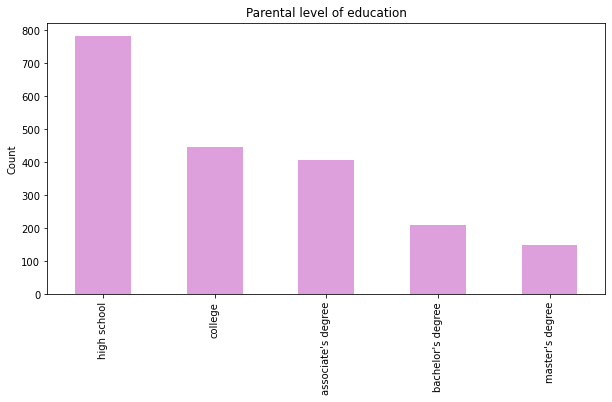

In [239]:
ed = df['Parental level of education'].value_counts().plot(kind = 'bar', title = 'Parental level of education', color = 'plum', figsize=(10, 5))
ed.set_ylabel('Count')

Так, родители большинства учеников, почти половина, закончили только школу, около 200 закончили колледж и примерно треть имеют ученую степень

Рассмотрим столбцы с баллами за тесты. Просуммируем баллы каждого ученика по всем предметам, чтобы найти общий балл.

In [240]:
df['Total_score'] = df['Math score'] + df['Reading score'] + df['Writing score']
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,college,standard,none,77,77,71,225
1996,male,group C,college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


Text(0.5, 0, 'Points')

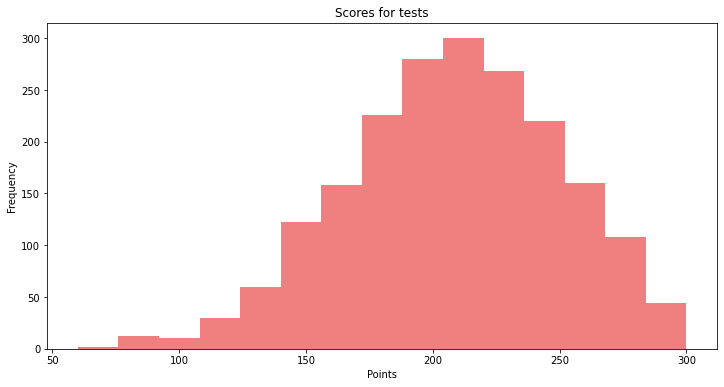

In [241]:
scores = df['Total_score'].plot(kind = 'hist', bins = 15, title = 'Scores for tests', color = 'lightcoral', figsize=(12,6))
scores.set_xlabel('Points')

Таким образом, большинство учеников имеют общий бал 200-210, распределение баллов похоже на нормальное, однако баллы больше среднего встречаются с одинаково убывающей частотой, а с меньшей стороны - наоборот, резко. Кроме того в промежутке от 50 до 100 могут иметь место выбросы

Text(0.5, 0, 'Points')

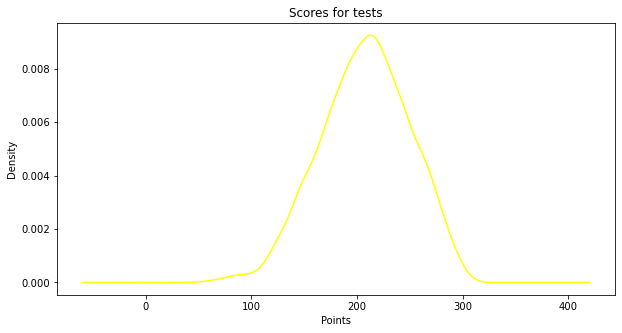

In [242]:
scores = df['Total_score'].plot(kind = 'kde', title = 'Scores for tests', color = 'yellow', figsize=(10, 5))
scores.set_xlabel('Points')

Судя по графику, самые распространенные баллы за тесты около 200. Распределение похоже на нормальное.

Рассмотрим колонку с информацией о поле.

Text(0.5, 0, 'Counts')

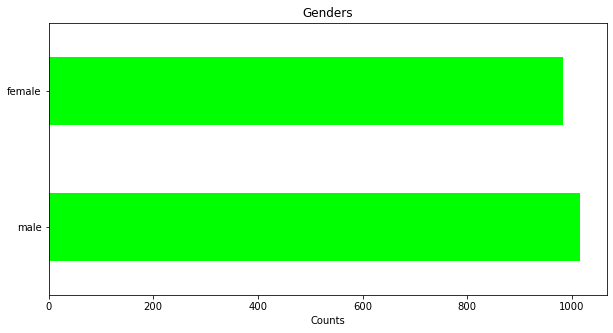

In [243]:
gend = df['Gender'].value_counts().plot(kind = 'barh', title = 'Genders', color='lime', figsize=(10, 5))
gend.set_xlabel('Counts')

Таким образом, мальчиков незначительно больше, чем девочек

Создадим графики ко всем остальным колонкам для облегчения их анализа. 

Text(0.5, 0, 'Counts')

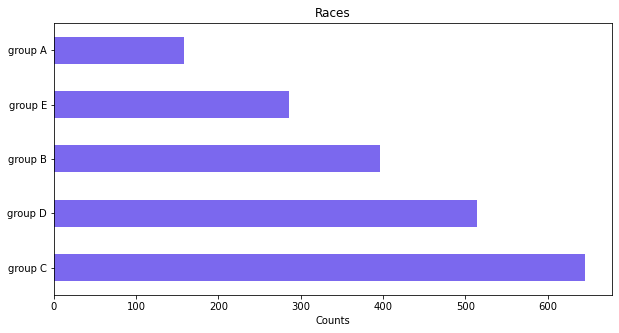

In [244]:
race = df['Race/ethnicity'].value_counts().plot(kind = 'barh', title = 'Races', color = 'mediumslateblue', figsize=(10, 5))
race.set_xlabel('Counts')

Так, имеется существенное различие в частоте, с которой встречаются разные расы. Самая многочисленная - группа С, а самая малочисленная - А

Text(0.5, 0, 'Counts')

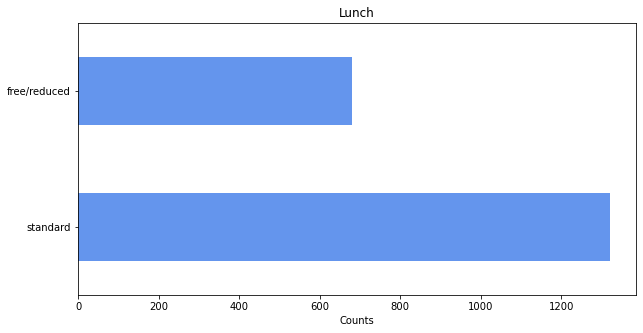

In [245]:
lunch = df['Lunch'].value_counts().plot(kind = 'barh', title = 'Lunch', color='cornflowerblue', figsize=(10, 5))
lunch.set_xlabel('Counts')

Большинство студентов ели стандартный ланч, и около трети - социальный (бесплатный). В таких датасетах эта характеристика является способом показать уровень доходов школьника 

Text(0.5, 0, 'Counts')

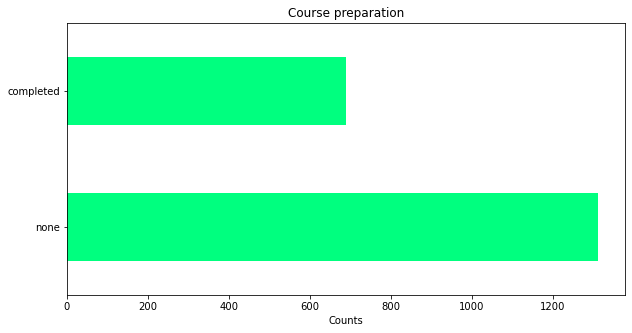

In [246]:
course = df['Test preparation course'].value_counts().plot(kind = 'barh', title = 'Course preparation', color = 'springgreen', figsize=(10, 5))
course.set_xlabel('Counts')

Только треть студентов прошли подготовительный курс, то есть это не связано с уровнем достатка (ланч).

In [247]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,college,standard,none,77,77,71,225
1996,male,group C,college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


### Зависимость между образованием родителей и общим баллом 

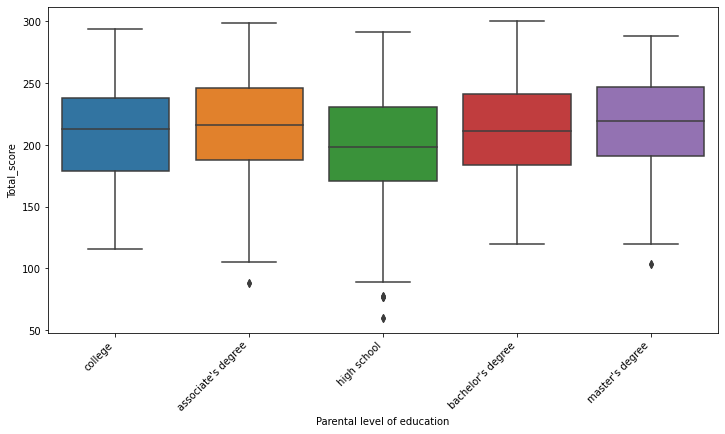

In [248]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Parental level of education', y = 'Total_score', data = df)
plt.xticks(rotation=45, 
           ha='right')
plt.show()

Зависимость между образованем родителей и общим баллом по тестам учащихся. 

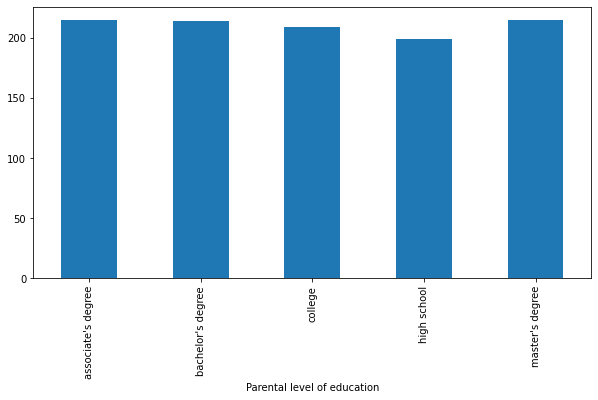

In [249]:
ed_mean = df.groupby('Parental level of education')['Total_score'].mean().plot(kind = 'bar', figsize=(10, 5))

Судя по графикам, наименьшие баллы по тестам получают учащиеся, родители которых закончили только старшую школу. После них идут те, родители которых закончили колледж. Те студенты, родители которых закончили магистратуру, бакалавриат или имеют степень ассоциата имеют баллы примерно наравне. Хотя они не сильно выше, чем студенты с родителями, которые закончили колледж или старшую школу. 

### Зависимость между прохождением курса и суммарными баллами

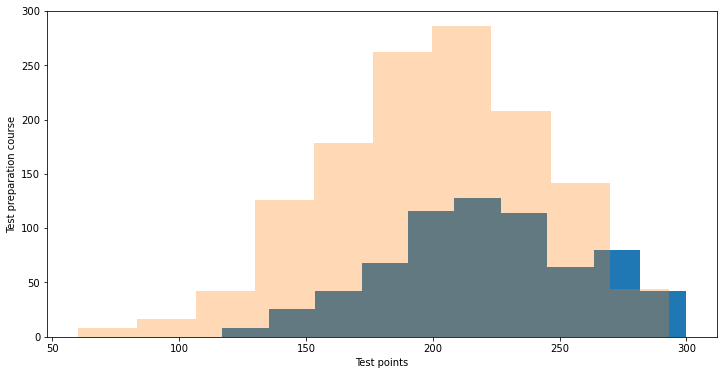

In [250]:
plt.figure(figsize=(12,6))
plt.hist(x = df[df['Test preparation course'] == 'completed']['Total_score'])
plt.hist(x = df[df['Test preparation course'] == 'none']['Total_score'], alpha = 0.3)
plt.xlabel("Test points")
plt.ylabel("Test preparation course")
plt.show()

Судя по гистограмме, количество студентов, которые не прошли курс, больше, чем количество студентов, которые прошли курс. При этом баллы студентов, которые прошли курс в среднем выше. Также максимальный балл студента, который прошел курс выше, чем максимальный балл студента, который не прошел курс. Прошедшие курс вырываются вперед по баллам. 

### Зависимость между присутствием бесплатного ланча и суммарными баллами

<AxesSubplot:xlabel='Total_score', ylabel='Count'>

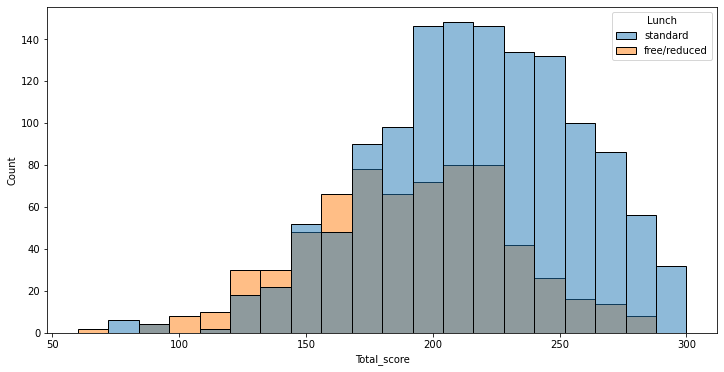

In [251]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Total_score', hue = 'Lunch', data = df, bins = 20)

Судя по гистограмме, стандартный ланч получили больше студентов, чем бесплатный. При этом те студенты, которые получили стандартный ланч имеют более высокие баллы, чем те студенты, которые получили бесплатный. 

### Зависимость между прохождением курса и присутствием бесплатного обеда

<AxesSubplot:xlabel='Lunch', ylabel='count'>

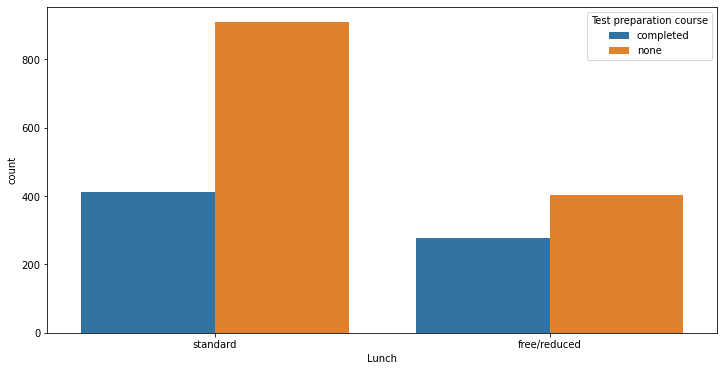

In [252]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lunch', hue = 'Test preparation course', data = df)

Судя по гистограмме, студентов, которые получили стандартный ланч в целом больше, чем студентов, которые получили бесплатный ланч. Также можно отметить, что среди студентов, которые получили стандартный ланч, доля тех, которые прошли курс, примерно в 2 раза меньше, чем тех, которые не прошли курс. Среди студентов, которые получили бесплатный ланч, доля тех, которые прошли курс меньше доли тех, которые прошли курс, примерно в 1.5 раза.  

### Зависимость между баллами по тесту по математике и баллами по чтению

<AxesSubplot:xlabel='Math score', ylabel='Reading score'>

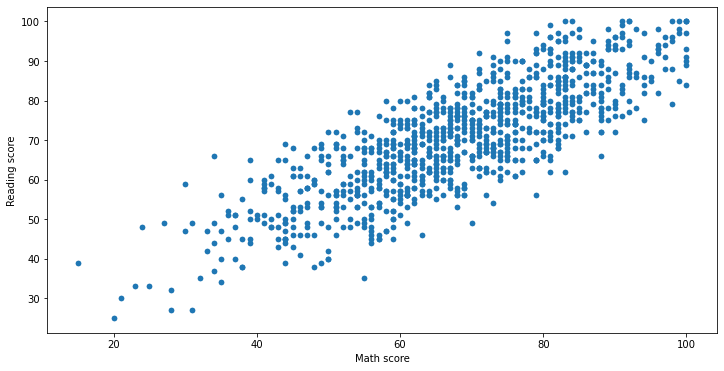

In [253]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Reading score', figsize=(12 , 6))

### Зависимость между баллами по математике и баллами по письму

<AxesSubplot:xlabel='Math score', ylabel='Writing score'>

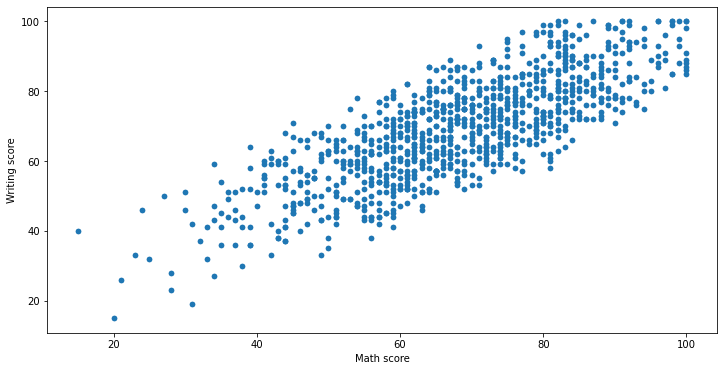

In [254]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Writing score', figsize=(12 , 6))

In [255]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,college,standard,none,77,77,71,225
1996,male,group C,college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


## Гипотезы

1. Пол не влияет на общий балл


2. Раса на влияет на общий балл


3. Наличие ученой степени у родителя повышает шансы ребенка иметь высокий общий балл


4. Студенты, которые  прошли подготовительный курс учатся лучше


5. Наличие у родителя высшего образования влияет на то, пройдут ли его дети подготовительные курсы


6. Пол студента влияет на то, пройдет ли студент подготовительные курсы








# Проверка гипотез

In [256]:
import scipy.stats as sts
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

# Гипотеза 1

### Проверим влияет ли пол студентов на их баллы

H0: средний общий балл девочек равен среднему обшему баллу мальчиков
    
    
H1: средний общий балл девочек больше, чем средний общий балл мальчиков 

In [257]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,college,standard,none,77,77,71,225
1996,male,group C,college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


In [258]:
female_score = df[df['Gender'] == 'female']['Total_score'] #Общие баллы студентов женского пола
female_score

0       207
2       210
4       254
6       245
7       165
       ... 
1987    282
1990    223
1991    226
1994    269
1997    239
Name: Total_score, Length: 984, dtype: int64

In [259]:
male_score = df[df['Gender'] == 'male']['Total_score']   #Общие баллы студентов мужского пола
male_score

1       276
3       203
5       179
8       228
10      212
       ... 
1993    237
1995    225
1996    212
1998    214
1999    150
Name: Total_score, Length: 1016, dtype: int64

Сделаем тест Колмогорова-Смирнова на уровне значимости 0.05, чтобы проверить выборки на нормальность

In [260]:
stats.kstest(female_score, 'norm', args=(female_score.mean(), female_score.std(ddof=1)))

KstestResult(statistic=0.04324061280412517, pvalue=0.048993116639263534)

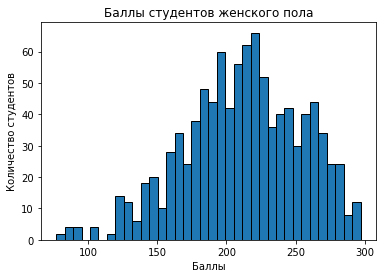

In [261]:
plt.hist(female_score, edgecolor = 'black', bins = int(180/5))
plt.title('Баллы студентов женского пола')
plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.show()

P-value больше, чем 0.05, значит гипотеза о нормальности баллов студентов женского пола не отвергается.

In [262]:
stats.kstest(male_score, 'norm', args=(male_score.mean(), male_score.std(ddof=1)))

KstestResult(statistic=0.029939371915317814, pvalue=0.31594795048025137)

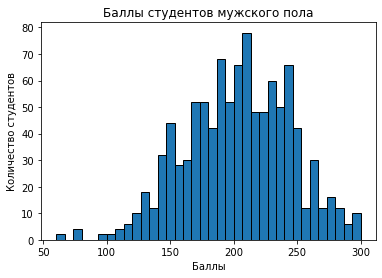

In [263]:
plt.hist(male_score, edgecolor = 'black', bins = int(180/5))
plt.title('Баллы студентов мужского пола')
plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.show()

P-value больше, чем 0.05. Гипотеза о нормальности баллов студентов мужского пола не отвергается. 

Выборки нормальные. Наблюдений много. Значит для тестирования гипотезы мы можем использовать точный тест.

In [264]:
def t1_tect(group_score1, group_score2): #Функция, которая делает точный тест
    alpha = 0.05                 # Уровень значимости = 5%
    n1 = group_score1.size       # Размер  выборки студентов женского пола 
    n2 = group_score2.size       # Размер  выборки студентов мужского 
    mu_1 = group_score1.mean()   # среднее значение баллов студентов женского пола 
    mu_2 = group_score2.mean()   # среднее значение баллов студентов мужского пола 
    std = np.sqrt(group_score1.var(ddof=1)/n1 + group_score2.var(ddof=1)/n2)   # стандартное отклонение
    t_obs = (mu_1 - mu_2)/std            # наблюдаемое значение статистики 
    t_crit = stats.t(n1+n2-2).ppf(1 - alpha)   # критическое значение статистики
    return t_obs,  t_crit

In [265]:
t1_tect(female_score, male_score)

(4.576284774392776, 1.6456166300576656)

Рассчетная статистика больше, чем критическая точка. Отвергаем основную гепотезу о том, что баллы студентов женского и мужского пола равны. Принимаем альтернативную гипотезы о том, что баллы студентов женского пола больше, чем баллы студентов мужского пола. 

# Гипотеза 2

### Проверим влияет ли раса студентов на их баллы

H0: Средние баллы студентов рас равны между собой
    
    
H1: Средние баллы студентов рас не равны между собой

In [266]:
A_score = df[df['Race/ethnicity'] == 'group A']['Total_score']
B_score = df[df['Race/ethnicity'] == 'group B']['Total_score']
C_score = df[df['Race/ethnicity'] == 'group C']['Total_score']
D_score = df[df['Race/ethnicity'] == 'group D']['Total_score']
E_score = df[df['Race/ethnicity'] == 'group E']['Total_score']

Сделаем тест Колмогорова-Смирнова на уровне значимости 0.05, чтобы проверить выборки на нормальность

In [268]:
stats.kstest(A_score, 'norm', args=(A_score.mean(), A_score.std(ddof=1)))

KstestResult(statistic=0.07732992549288942, pvalue=0.2862597727243814)

In [269]:
stats.kstest(B_score, 'norm', args=(B_score.mean(), B_score.std(ddof=1)))

KstestResult(statistic=0.04450865762328404, pvalue=0.40109685768797276)

In [270]:
stats.kstest(C_score, 'norm', args=(C_score.mean(), C_score.std(ddof=1)))

KstestResult(statistic=0.04471335966029444, pvalue=0.14654847072685162)

In [271]:
stats.kstest(D_score, 'norm', args=(D_score.mean(), D_score.std(ddof=1)))

KstestResult(statistic=0.037797765184763576, pvalue=0.4440202815694104)

In [272]:
stats.kstest(E_score, 'norm', args=(E_score.mean(), E_score.std(ddof=1)))

KstestResult(statistic=0.09579603811515414, pvalue=0.009786907754493446)

Все баллы pvalue больше 0.05, кроме расы E. Баллы студентов большинства рас распределены нормально. Так как наблюдений много, то используем точный тест. С расой E используем асимптотический тест. 

А и В

In [356]:
def t_test(group_score1, group_score2): #Функция, которая составляет ДИ и расчетную статистику в точном тесте
    alpha = 0.05            # Уровень значимости = 5%
    n1 = group_score1.size  # Размер  выборки студентов первой расы 
    n2 = group_score2.size   # Размер  выборки студентов второй расы 
    mu_1 = group_score1.mean()   # среднее значение баллов студентов первой расы 
    mu_2 = group_score2.mean()   # среднее значение баллов студентов второй расы 
    std = np.sqrt(group_score1.var(ddof=1)/n1 + group_score2.var(ddof=1)/n2)   # стандартное отклонение
    t_obs = (mu_1 - mu_2)/std                      # наблюдаемое значение статистики 
    t_crit = stats.t(n1+n2 - 2).ppf(1 - alpha/2)   # критическое значение статистики
    return t_obs, (-t_crit, t_crit)

In [357]:
def asy_test(group_score1, group_score2): #Ассимптотический тест для двух выборок - https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/10_13_python_mouse_and_man.ipynb
    alpha = 0.05                                                        # уровень значимости = 5%
    nx, ny = group_score1.size, group_score2.size                       # размер выборок

    diff = group_score1.mean() - group_score2.mean()                                # разность средних
    diff_std = np.sqrt(group_score1.var(ddof=1)/nx + group_score2.var(ddof=1)/ny)   # стандартное отклонение

    z_obs = diff/diff_std                       # наблюдаемое значение
    z_crit = stats.norm.ppf(1 - alpha/2)        # критическое значение
    return z_obs, (-z_crit, z_crit)

In [358]:
t_test(A_score, B_score)

(0.9664088379724373, (-1.9642708556448625, 1.9642708556448625))

Расчетная статистика входит в доверительный интервал. Значит нулевая гипотеза о том, что в среднем баллы расы А равны баллам расы В не отвергается. 

В и С

In [359]:
t_test(B_score, C_score)

(-0.6080131953779587, (-1.9622476264013182, 1.9622476264013182))

Рассчетная статистика входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы В равны баллам расы С не отвергается. 

C и D

In [360]:
t_test(C_score, D_score)

(-4.039324634685765, (-1.962014684478017, 1.962014684478017))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы C равны баллам расы D отвергается.

D и E

In [361]:
asy_test(D_score, E_score)

(-6.013404498888543, (-1.959963984540054, 1.959963984540054))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы D равны баллам расы E отвергается.

A и E

In [362]:
asy_test(A_score, E_score)

(-7.105700108174749, (-1.959963984540054, 1.959963984540054))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы A равны баллам расы E отвергается.

B и E

In [363]:
asy_test(B_score, E_score)

(-9.363138717302482, (-1.959963984540054, 1.959963984540054))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы B равны баллам расы E  отвергается.

C и E

In [364]:
asy_test(C_score, E_score)

(-9.87084556526116, (-1.959963984540054, 1.959963984540054))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы C равны баллам расы E отвергается.

A и C

In [365]:
t_test(A_score, C_score)

(0.5588513007336168, (-1.962926321861699, 1.962926321861699))

Расчетная статистика входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы A равны баллам расы C не отвергается.

A и D

In [366]:
t_test(A_score, D_score)

(-2.3787362323661827, (-1.9635109839634393, 1.9635109839634393))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы A равны баллам расы D отвергается.

B и D

In [367]:
t_test(B_score, D_score)

(-4.0767867671661815, (-1.962580044904687, 1.962580044904687))

Расчетная статистика не входит в ДИ. Значит нулевая гипотеза о том, что в среднем баллы расы B равны баллам расы D отвергается.

# Гипотеза 3

### Проверим влияет ли наличие высшего образования у родителей на оценки студентов. 

H0: Средние баллы студентов, родители которых получили высшее образование, равны средним баллам студентов, родители которых не получили высшее образование. 
    

H1: Средние баллы студентов, родители которых получили высшее образование, выше, чем средние баллы студентов, родители которых не получили высшее образование. 

Объедим все колонки, в которых у родителей нет высшего образования в 'no high ed'

In [286]:
df = df.replace('high school', 'no_high_ed')
df = df.replace('some high school', 'no_high_ed')
df = df.replace('some college', 'no_high_ed')
df = df.replace('college', 'no_high_ed')

Объедим все колонки, в которых у людей есть высшее образование в 'high ed'

In [287]:
df = df.replace("bachelor's degree",'high_ed')
df = df.replace("master's degree",'high_ed')
df = df.replace("associate's degree",'high_ed')

In [288]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,no_high_ed,standard,completed,59,70,78,207
1,male,group D,high_ed,standard,none,96,93,87,276
2,female,group D,no_high_ed,free/reduced,none,57,76,77,210
3,male,group B,no_high_ed,free/reduced,none,70,70,63,203
4,female,group D,high_ed,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,no_high_ed,standard,none,77,77,71,225
1996,male,group C,no_high_ed,standard,none,80,66,66,212
1997,female,group A,no_high_ed,standard,completed,67,86,86,239
1998,male,group E,no_high_ed,standard,none,80,72,62,214


Сохраним в отдельные переменные выборки, которые собираемся сравнивать

In [289]:
high_ed = df[df['Parental level of education'] == 'high_ed']['Total_score']
no_high_ed = df[df['Parental level of education'] == 'no_high_ed']['Total_score']

Сделаем тест Колмогорова-Смирнова, чтобы проверить нормальность

In [290]:
stats.kstest(high_ed, 'norm', args=(df['Total_score'].mean(), df['Total_score'].std(ddof=1)))

KstestResult(statistic=0.10582626574890946, pvalue=6.067876663651901e-08)

p-value слишком низкое. Гипотеза о нормальности в выборке студентов с родителями с высшим образованием отвергается.

In [291]:
stats.kstest(no_high_ed, 'norm', args=(df['Total_score'].mean(), df['Total_score'].std(ddof=1)))

KstestResult(statistic=0.054218350354603206, pvalue=0.0013744435058828926)

Гипотеза о нормальности в выборки студентов с родителями без высшего образования не отвергается.

Гипотезу тестируем с помощью асимптотического критерия, так как наблюдений много, а распределение отличается от нормального.

In [292]:
df_agg = df.groupby('Parental level of education')['Total_score'].agg(['mean', 'count'])
df_agg

,mean,count
Parental level of education,,
high_ed,214.682292,768
no_high_ed,202.750000,1232


In [293]:
alpha = 0.05
n1 = high_ed.size
n2 = no_high_ed.size
m1 = df_agg['mean']['high_ed']
m2 = df_agg['mean']['no_high_ed']
std1 = high_ed.std(ddof=1)/np.sqrt(n1)
std2 = no_high_ed.std(ddof=1)/np.sqrt(n2)

z_obs = (m1-m2)/(std1+std2)
z_cr = stats.norm.ppf(1 - alpha)

In [294]:
z_obs, z_cr

(4.435247345641305, 1.6448536269514722)

Рассчетная статистика больше, чем критическая точка. Значит нулевая гипотеза отверагется. Принимаем альтернативную гипотезу о том, что студенты с родителями с вышим образованием в среднем пишут тесты на большее количество баллов, чем студенты с родителями со средним образованием.

# Гипотеза 4

### Проверим влияет ли прохождение подготовительного курса на средний балл студентов. 

H0: Средние баллы студентов, которые прошли подготовительный курс равны средним баллам студентов, которые не прошли подготовительный курс. 

H1: Средние баллы студентов, которые прошли подготовительный курс выше, чем средние баллы студентов, которые не прошли подготовительный курс. 

Сохраним в отдельные переменные выборки, которые собираемся сравнивать. 

In [295]:
course = df[df['Test preparation course'] == 'completed']['Total_score']
no_course = df[df['Test preparation course'] == 'none']['Total_score']

Сделаем тест Колмогорова-Смирнова, чтобы проверить выборки на нормальность. 

In [296]:
stats.kstest(course, 'norm', args=(df['Total_score'].mean(), df['Total_score'].std(ddof=1)))

KstestResult(statistic=0.14504236490503725, pvalue=4.2832772130864386e-13)

P-value слишком низкое. Гипотеза о нормальности в выборке студентов, прошедших подготовительный курс отвергается.

In [297]:
stats.kstest(no_course, 'norm', args=(df['Total_score'].mean(), df['Total_score'].std(ddof=1)))

KstestResult(statistic=0.06500786571728934, pvalue=2.9009592059069227e-05)

P-value слишком низкое. Гипотеза о нормальности в выборке студентов, прошедших подготовительный курс отвергается.

In [298]:
df_agg2 = df.groupby('Test preparation course')['Total_score'].agg(['mean', 'count'])
df_agg2

,mean,count
Test preparation course,,
completed,220.869186,688
none,200.233232,1312


In [299]:
alpha = 0.05
n1 = course.size
n2 = no_course.size
m1 = df_agg2['mean']['completed']
m2 = df_agg2['mean']['none']
std1 = course.std(ddof=1)/np.sqrt(n1)
std2 = no_course.std(ddof=1)/np.sqrt(n2)

z_obs = (m1-m2)/(std1+std2)
z_cr = stats.norm.ppf(1 - alpha)

In [300]:
z_obs, z_cr

(7.817671026350846, 1.6448536269514722)

Рассчетная статистика больше, чем критическая точка. Значит нулевая гипотеза отверагется. Принимаем альтернативную гипотезу о том, что студенты прошедшие подготовительный курс в среднем пишут тесты на большее количество баллов, чем студенты не прошедшие подготовительный курс. 

# Гипотеза 5

### Проверим гипотезу о том, что родители с высшим образованием с большей вероятностью захотят, чтобы их дети прошли подготовительные курсы. 

H0: Доля родителей с высшим образованием, дети которых прошли подготовительные курсы, равна доле родителей со средним образованием, дети которых прошли подготовительные курсы. 

H1: Доля родителей с высшим образованием, дети которых прошли подготовительные курсы больше доли родителей со средним образованием, дети которых прошли подготовительные курсы. 

Сначала изменим название колонки "Test preparation course" на "Test_preparation_course", чтобы с ней было удобнее работать. Сделаем значения в этой колонке бинарными. 

In [301]:
df.rename(columns={"Test preparation course": "Test_preparation_course"}, inplace=True)

In [302]:
df['Test_preparation_course'] = df['Test_preparation_course'].apply(lambda x: 1 if x == 'completed' else 0)

In [303]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test_preparation_course,Math score,Reading score,Writing score,Total_score
0,female,group D,no_high_ed,standard,1,59,70,78,207
1,male,group D,high_ed,standard,0,96,93,87,276
2,female,group D,no_high_ed,free/reduced,0,57,76,77,210
3,male,group B,no_high_ed,free/reduced,0,70,70,63,203
4,female,group D,high_ed,standard,0,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,no_high_ed,standard,0,77,77,71,225
1996,male,group C,no_high_ed,standard,0,80,66,66,212
1997,female,group A,no_high_ed,standard,1,67,86,86,239
1998,male,group E,no_high_ed,standard,0,80,72,62,214


In [304]:
course_comp = df[df['Parental level of education'] == 'high_ed'].Test_preparation_course.values
course_no_comp = df[df['Parental level of education'] == 'no_high_ed'].Test_preparation_course.values

In [305]:
alpha = 0.05                                       # уровень значимости = 5%       https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/10_13_python_mouse_and_man.ipynb
n1,n2 = course_comp.size, course_no_comp.size      # размеры выборок
m1,m2 = course_comp.sum(), course_no_comp.sum()    # число успехов

p1, p2 = course_comp.mean(), course_no_comp.mean() # точеные оценки долей 
diff = p1 - p2                                     # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))        # стандартное отклонение разности
                                    
z_obs = diff/diff_std                              # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)    

In [306]:
z_obs, z_crit

(0.17498318575825375, 1.6448536269514722)

Рассчетная статистика меньше критической точки. Нулевая гипотеза не отвергается. Доля родителей с высшим образованием, дети которых прошли подготовительные курсы равна доле родителей со средним образованием, дети которых прошли подготовительные курсы.

Проверим есть ли зависимость между образованием родителей и прохождением курсов через Хи квадрат. 

In [307]:
df.groupby('Parental level of education')['Test_preparation_course'].value_counts()

Parental level of education  Test_preparation_course
high_ed                      0                          502
                             1                          266
no_high_ed                   0                          810
                             1                          422
Name: Test_preparation_course, dtype: int64

Сделаем отдельную таблицу с частотами. 

In [308]:
freq = pd.DataFrame([[266,422],[502, 810]])
freq.columns = ["high_ed","no_high_ed"]
freq.index = ["course", "no_course"]
freq

,high_ed,no_high_ed
course,266,422
no_course,502,810


Сначала посчитаем долю родителей с высшим образованием, которые купили курс и долю родителей со средним образованием, которые купили курс. 

In [309]:
sum_all = freq.values.sum() #Сумма всех родителей
dol1 = freq['high_ed']['course']/sum_all # доля родителей с высшим образованием, которые купили курс
dol2 = freq['no_high_ed']['course']/sum_all # доля родителей со средним образованием, которые купили курс

In [310]:
dol1, dol2 # Доля родителей с высшим образованием, которые купили курс меньше доли родителей со средним образованием

(0.133, 0.211)

In [311]:

chi, pvalue, k, _ = chi2_contingency(freq.values, correction=False)

In [312]:
pvalue

0.8610928455630039

P-value больше, чем 0.05. Нулевая гипотеза не отвергается. Выборки независимы. Уровень образования родителей не влияет на прохождение подготовительного курса студентами. 

# Гипотеза 6

### Проверим гипотезу о том, что больше студентов женского пола прошли подготовительный курс, чем студентов мужского пола. 

H0: Пол студента не влияет на то, пройдет ли студент подготовительный курс



H1: Пол студента влияет на то, пройдет ли студент подготовительный курс

In [313]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test_preparation_course,Math score,Reading score,Writing score,Total_score
0,female,group D,no_high_ed,standard,1,59,70,78,207
1,male,group D,high_ed,standard,0,96,93,87,276
2,female,group D,no_high_ed,free/reduced,0,57,76,77,210
3,male,group B,no_high_ed,free/reduced,0,70,70,63,203
4,female,group D,high_ed,standard,0,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,no_high_ed,standard,0,77,77,71,225
1996,male,group C,no_high_ed,standard,0,80,66,66,212
1997,female,group A,no_high_ed,standard,1,67,86,86,239
1998,male,group E,no_high_ed,standard,0,80,72,62,214


Сделаем таблицу частот

In [314]:
df.groupby('Gender')['Test_preparation_course'].value_counts()

Gender  Test_preparation_course
female  0                          630
        1                          354
male    0                          682
        1                          334
Name: Test_preparation_course, dtype: int64

In [315]:
freq2 = pd.DataFrame([[354,334],[630, 682]])
freq2.columns = ["female","male"]
freq2.index = ["course", "no_course"]
freq2

,female,male
course,354,334
no_course,630,682


Посчитаем долю студентов женского пола, которые купили курс и долю студентов мужского пола, которые купили курс. 

In [316]:
sum_all2 = freq2.values.sum() #Сумма всех студентов
dol3 = freq2['female']['course']/sum_all # доля студентов женского пола, которые купили курс
dol4 = freq2['male']['course']/sum_all # доля студентов мужского пола, которые купили курс

In [317]:
dol3, dol4  # доля студентов женского пола, которые купили курс больше, чем доля студентов мужского пола, которые купили курс

(0.177, 0.167)

In [318]:
chi, pvalue, k, _ = chi2_contingency(freq2.values, correction=False)

In [319]:
pvalue

0.14435442425442135

Pvalue больше 0.05. Нулевая гипотеза не отвергается. Выборки независимы. Пол студента не влияет на прохождение подготовительного курса.